In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
%matplotlib inline
from sklearn import preprocessing 
from sklearn import datasets, linear_model

In [2]:
#reading the dataset
df = pd.read_csv("train.csv",encoding='latin-1')

## Fetching Live Tweets

In [3]:
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

from textblob import TextBlob
 
#import twitter_credentials
# Variables that contains the user credentials to access Twitter API 
ACCESS_TOKEN = "1113114787473371136-UIFWlK19yFNw7XEQhSft1jfiHbzhce"
ACCESS_TOKEN_SECRET = "rVson5wuySWh2qejUDxtdeZQJJGmeAJdHcOCyInd3CZao"
CONSUMER_KEY = "kcECETl2cHMHFvcmZg00JJ7ox"
CONSUMER_SECRET = "bIgz1L54uQGYFAHIZynzj4GY33cAL3spPSO6v4n6dMbOauk0RH"
#please do change the value of the variables after you have created a twitter app copy your own credentials to the variables 


import numpy as np
import pandas as pd
import re


# # # # TWITTER CLIENT # # # #
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    


# # # # TWITTER AUTHENTICATER # # # #
class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
        return auth

# # # # TWITTER STREAMER # # # #
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)


# # # # TWITTER STREAM LISTENER # # # #
class TwitterListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
            # Returning False on_data method in case rate limit occurs.
            return False
        print(status)
        
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """

    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

 
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    tweets = api.user_timeline(screen_name="SkySportsPL", count=200)

    df_test = tweet_analyzer.tweets_to_data_frame(tweets)

In [4]:
df_test_predicted=df_test.copy()

# Visualizations

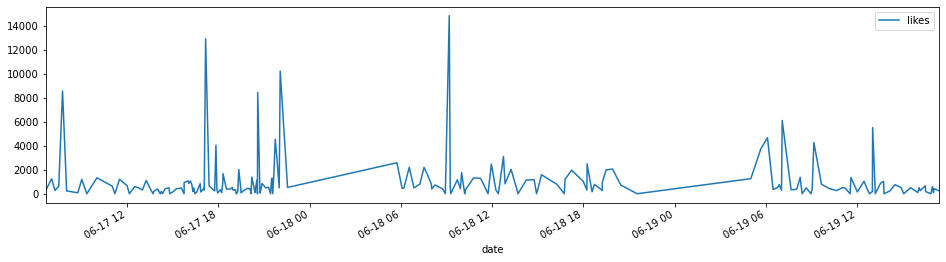

In [5]:
 # Layered Time Series:
time_likes = pd.Series(data=df_test_predicted['likes'].values, index=df_test_predicted['date'])
time_likes.plot(figsize=(16, 4), label="likes", legend=True)

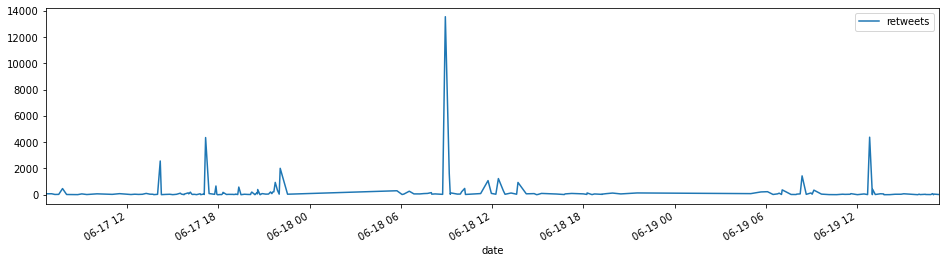

In [6]:
time_retweets = pd.Series(data=df_test_predicted['retweets'].values, index=df_test_predicted['date'])
time_retweets.plot(figsize=(16, 4), label="retweets", legend=True)
plt.show()

# Analysing Data

In [7]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [8]:
df.tail()

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


In [9]:
df_test.head()

,tweets,id,len,date,source,likes,retweets
0,Norwich City and Southampton players took a kn...,1274030006763749376,140,2020-06-19 17:23:18,Twitter for Advertisers,245,22
1,"""A powerful, symbolic message."" ✊\n\nPlayers f...",1274025295209693189,139,2020-06-19 17:04:35,Wildmoka,429,53
2,📣 - We're underway at Carrow Road! \n\nJoin us...,1274024627111632898,140,2020-06-19 17:01:55,Twitter for Advertisers,89,6
3,Probably a good idea to double-check the goal-...,1274023636559691776,139,2020-06-19 16:57:59,Wildmoka,598,87
4,RT @SkySportsStatto: The importance of @Norwic...,1274022023283556352,144,2020-06-19 16:51:35,TweetDeck,0,18


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
ItemID           99989 non-null int64
Sentiment        99989 non-null int64
SentimentText    99989 non-null object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [11]:
df.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [12]:
df_test.isnull().sum()

tweets      0
id          0
len         0
date        0
source      0
likes       0
retweets    0
dtype: int64

In [13]:
df.Sentiment.value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

In [14]:
df['length'] = [len(t) for t in df.SentimentText]

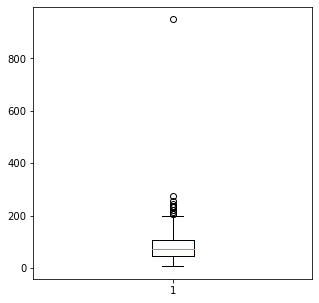

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.length)
plt.show()

In [16]:
#since Twitter Maximum Character Length is 280 so we remove the tweets beyondthat limit
df.drop(df[df['length'] > 280].index, inplace = True) 

In [17]:
#Converting html entities
from html.parser import HTMLParser
html_parser = HTMLParser()
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
df['clean_tweet'] = df['SentimentText'].apply(lambda x: html_parser.unescape(x))
df_test['clean_tweet'] = df_test['tweets'].apply(lambda x: html_parser.unescape(x))

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  """
C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  


In [18]:
import re
#Removing "@user" from all the test dataset tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
# remove twitter handles (@user)
df_test['clean_tweet'] = np.vectorize(remove_pattern)(df_test['clean_tweet'], "@[\w]*")
df_test.head(10)

,tweets,id,len,date,source,likes,retweets,clean_tweet
0,Norwich City and Southampton players took a kn...,1274030006763749376,140,2020-06-19 17:23:18,Twitter for Advertisers,245,22,Norwich City and Southampton players took a kn...
1,"""A powerful, symbolic message."" ✊\n\nPlayers f...",1274025295209693189,139,2020-06-19 17:04:35,Wildmoka,429,53,"""A powerful, symbolic message."" ✊\n\nPlayers f..."
2,📣 - We're underway at Carrow Road! \n\nJoin us...,1274024627111632898,140,2020-06-19 17:01:55,Twitter for Advertisers,89,6,📣 - We're underway at Carrow Road! \n\nJoin us...
3,Probably a good idea to double-check the goal-...,1274023636559691776,139,2020-06-19 16:57:59,Wildmoka,598,87,Probably a good idea to double-check the goal-...
4,RT @SkySportsStatto: The importance of @Norwic...,1274022023283556352,144,2020-06-19 16:51:35,TweetDeck,0,18,RT : The importance of ’s Teemu Pukki & ’s Dan...
5,"""They have to win tonight and I think it's a b...",1274016871499681793,139,2020-06-19 16:31:06,Wildmoka,179,23,"""They have to win tonight and I think it's a b..."
6,Ole Gunnar Solskjaer tells Sky Sports about Ma...,1274016592930562051,124,2020-06-19 16:30:00,Twitter for Advertisers,660,39,Ole Gunnar Solskjaer tells Sky Sports about Ma...
7,Despite being stripped of the captain's armban...,1274011412327739392,139,2020-06-19 16:09:25,Twitter for Advertisers,260,17,Despite being stripped of the captain's armban...
8,🚨 TEAM NEWS 🚨\n\nHere is the Norwich City line...,1274010344952913923,136,2020-06-19 16:05:10,Twitter for Advertisers,514,49,🚨 TEAM NEWS 🚨\n\nHere is the Norwich City line...
9,The Premier League is BACK 😍 So is @Super6! 💰 ...,1274009048527110147,140,2020-06-19 16:00:01,Twitter for Advertisers,98,9,The Premier League is BACK 😍 So is ! 💰 \n\nWan...


In [19]:
#Changing all the tweets into lowercase
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: x.lower())
df.head(10)

,ItemID,Sentiment,SentimentText,length,clean_tweet
0,1,0,is so sad for my APL frie...,61,is so sad for my apl frie...
1,2,0,I missed the New Moon trail...,51,i missed the new moon trail...
2,3,1,omg its already 7:30 :O,37,omg its already 7:30 :o
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132,.. omgaga. im sooo im gunna cry. i'...
4,5,0,i think mi bf is cheating on me!!! ...,53,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?,42,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,41,juuuuuuuuuuuuuuuuussssst chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...,61,sunny again work tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...,53,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-),46,hmmmm.... i wonder how she my number @-)


In [20]:
df_test['clean_tweet'] = df_test['clean_tweet'].apply(lambda x: x.lower())
df_test.head(10)

,tweets,id,len,date,source,likes,retweets,clean_tweet
0,Norwich City and Southampton players took a kn...,1274030006763749376,140,2020-06-19 17:23:18,Twitter for Advertisers,245,22,norwich city and southampton players took a kn...
1,"""A powerful, symbolic message."" ✊\n\nPlayers f...",1274025295209693189,139,2020-06-19 17:04:35,Wildmoka,429,53,"""a powerful, symbolic message."" ✊\n\nplayers f..."
2,📣 - We're underway at Carrow Road! \n\nJoin us...,1274024627111632898,140,2020-06-19 17:01:55,Twitter for Advertisers,89,6,📣 - we're underway at carrow road! \n\njoin us...
3,Probably a good idea to double-check the goal-...,1274023636559691776,139,2020-06-19 16:57:59,Wildmoka,598,87,probably a good idea to double-check the goal-...
4,RT @SkySportsStatto: The importance of @Norwic...,1274022023283556352,144,2020-06-19 16:51:35,TweetDeck,0,18,rt : the importance of ’s teemu pukki & ’s dan...
5,"""They have to win tonight and I think it's a b...",1274016871499681793,139,2020-06-19 16:31:06,Wildmoka,179,23,"""they have to win tonight and i think it's a b..."
6,Ole Gunnar Solskjaer tells Sky Sports about Ma...,1274016592930562051,124,2020-06-19 16:30:00,Twitter for Advertisers,660,39,ole gunnar solskjaer tells sky sports about ma...
7,Despite being stripped of the captain's armban...,1274011412327739392,139,2020-06-19 16:09:25,Twitter for Advertisers,260,17,despite being stripped of the captain's armban...
8,🚨 TEAM NEWS 🚨\n\nHere is the Norwich City line...,1274010344952913923,136,2020-06-19 16:05:10,Twitter for Advertisers,514,49,🚨 team news 🚨\n\nhere is the norwich city line...
9,The Premier League is BACK 😍 So is @Super6! 💰 ...,1274009048527110147,140,2020-06-19 16:00:01,Twitter for Advertisers,98,9,the premier league is back 😍 so is ! 💰 \n\nwan...


In [21]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not","couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I would",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have","mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had","that'd've": "that would have",
"that's": "that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will","we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have","who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [22]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [23]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
df_test['clean_tweet'] = df_test['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))

In [24]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace","cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend","gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked","irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female","m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if","wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [25]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
df_test['clean_tweet'] = df_test['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))

In [26]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [27]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
df_test['clean_tweet'] = df_test['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))

In [28]:
import re
#replacing special characters with space
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df_test['clean_tweet'] = df_test['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))

In [29]:
df.head(10)

,ItemID,Sentiment,SentimentText,length,clean_tweet
0,1,0,is so sad for my APL frie...,61,is so sad for my apl frie...
1,2,0,I missed the New Moon trail...,51,i missed the new moon trail...
2,3,1,omg its already 7:30 :O,37,oh my god its already 7 30 o
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132,omgaga im sooo im gunna cry I ...
4,5,0,i think mi bf is cheating on me!!! ...,53,i think mi boyfriend is cheating on m...
5,6,0,or i just worry too much?,42,or i just worry too much
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,41,juuuuuuuuuuuuuuuuussssst chillin
7,8,0,Sunny Again Work Tomorrow :-| ...,61,sunny again work tomorrow ...
8,9,1,handed in my uniform today . i miss you ...,53,handed in my uniform today i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-),46,hmmmm i wonder how she my number


In [30]:
df_test.head()

,tweets,id,len,date,source,likes,retweets,clean_tweet
0,Norwich City and Southampton players took a kn...,1274030006763749376,140,2020-06-19 17:23:18,Twitter for Advertisers,245,22,norwich city and southampton players took a kn...
1,"""A powerful, symbolic message."" ✊\n\nPlayers f...",1274025295209693189,139,2020-06-19 17:04:35,Wildmoka,429,53,a powerful symbolic message players fro...
2,📣 - We're underway at Carrow Road! \n\nJoin us...,1274024627111632898,140,2020-06-19 17:01:55,Twitter for Advertisers,89,6,we are underway at carrow road join us ...
3,Probably a good idea to double-check the goal-...,1274023636559691776,139,2020-06-19 16:57:59,Wildmoka,598,87,probably a good idea to double check the goal ...
4,RT @SkySportsStatto: The importance of @Norwic...,1274022023283556352,144,2020-06-19 16:51:35,TweetDeck,0,18,rt the importance of s teemu pukki s dan...


In [31]:
#tokenizing a collection of text documents and building a vocabulary of known words,and also encoding new documents using that vocabulary.
#count the number of words (term frequency)
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['clean_tweet'])
X_train_counts.shape

(99988, 104550)

In [32]:
X_test_counts = count_vect.transform(df_test['clean_tweet'])
X_test_counts.shape

(200, 104550)

In [33]:
#computing the IDF values
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(99988, 104550)

In [34]:
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_tfidf.shape

(200, 104550)

In [35]:
y = df['Sentiment']

# Modeling and Prediction

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, test_size=0.30, random_state=42)

In [38]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
model.fit(X_train_tfidf,y)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [39]:
y_predict1 = model.predict(X_test)

In [40]:
print(f1_score(y_test, y_predict1, average="macro"))

0.9272475563287591


In [41]:
Y_test_pred=model.predict(X_test_tfidf)
Y_test_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [42]:
df_test_predicted['Sentiment']=Y_test_pred

In [43]:
df_test_predicted.head(10)

,tweets,id,len,date,source,likes,retweets,Sentiment
0,Norwich City and Southampton players took a kn...,1274030006763749376,140,2020-06-19 17:23:18,Twitter for Advertisers,245,22,0
1,"""A powerful, symbolic message."" ✊\n\nPlayers f...",1274025295209693189,139,2020-06-19 17:04:35,Wildmoka,429,53,0
2,📣 - We're underway at Carrow Road! \n\nJoin us...,1274024627111632898,140,2020-06-19 17:01:55,Twitter for Advertisers,89,6,0
3,Probably a good idea to double-check the goal-...,1274023636559691776,139,2020-06-19 16:57:59,Wildmoka,598,87,1
4,RT @SkySportsStatto: The importance of @Norwic...,1274022023283556352,144,2020-06-19 16:51:35,TweetDeck,0,18,1
5,"""They have to win tonight and I think it's a b...",1274016871499681793,139,2020-06-19 16:31:06,Wildmoka,179,23,1
6,Ole Gunnar Solskjaer tells Sky Sports about Ma...,1274016592930562051,124,2020-06-19 16:30:00,Twitter for Advertisers,660,39,1
7,Despite being stripped of the captain's armban...,1274011412327739392,139,2020-06-19 16:09:25,Twitter for Advertisers,260,17,0
8,🚨 TEAM NEWS 🚨\n\nHere is the Norwich City line...,1274010344952913923,136,2020-06-19 16:05:10,Twitter for Advertisers,514,49,0
9,The Premier League is BACK 😍 So is @Super6! 💰 ...,1274009048527110147,140,2020-06-19 16:00:01,Twitter for Advertisers,98,9,1


In [44]:
df_test_predicted.tail()

,tweets,id,len,date,source,likes,retweets,Sentiment
195,How high will Manchester United finish this se...,1273159695486734336,51,2020-06-17 07:45:00,Twitter for Advertisers,8572,474,0
196,"It's been a long wait, but how much longer wil...",1273155920810446848,112,2020-06-17 07:30:00,Twitter for Advertisers,618,33,1
197,"""I will judge my players by what happens on th...",1273152145764777986,140,2020-06-17 07:15:00,Twitter Ads,270,26,1
198,Time for your relegation predictions...,1273148874291417088,39,2020-06-17 07:02:00,Twitter for Advertisers,1244,80,1
199,"Liverpool are set to win the title, but what e...",1273143337793531904,140,2020-06-17 06:40:00,Twitter Ads,337,77,1
